#  SET 2

### Bahador Amjadi
### Matricula:  2040470

In [1]:
library(ggplot2)
library(GoFKernel) #for finding the inverse
library(reshape2)  #for visualization

Warning message:
"package 'GoFKernel' was built under R version 3.6.3"Loading required package: KernSmooth
Warning message:
"package 'KernSmooth' was built under R version 3.6.3"KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009
Warning message:
"package 'reshape2' was built under R version 3.6.3"

## Exercise 1

In [2]:
E.value <- function(x,p) {return(sum(x*p))}  #a function that calculates the expected value
VAR     <- function(x,p) {return(E.value((x-E.value(x,p))**2, p))}  #a function that calculates variance

x  <- c(15.58, 15.9, 16,16.1, 16.2  )
p1 <- c(0.15, 0.21,  0.35,  0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

In [3]:
cat("Excepted Value of x for p1 is", E.value(x,p1), "\nVariance of x for p1 is",VAR(x,p1))
cat('\n\n')
cat("Excepted Value of x for p2 is", E.value(x,p2), "\nVariance of x for p2 is",VAR(x,p2))

Excepted Value of x for p1 is 15.959 
Variance of x for p1 is 0.033979

Excepted Value of x for p2 is 15.9622 
Variance of x for p2 is 0.02816716

## Exercise 2

In [4]:
options(repr.plot.width=4, repr.plot.height =2.5)  #changing size of plots

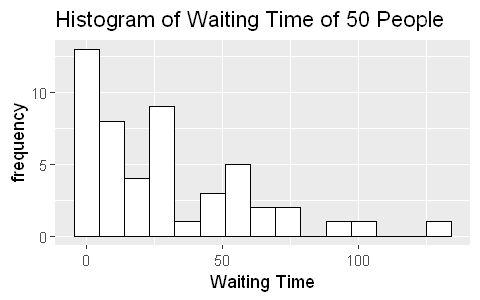

In [5]:
set.seed(1234)
#part A
rate = 1/30
N    = 50
df <- data.frame(person = seq(1,N) , time = rexp(N, rate))

ggplot(df, aes(x=time)) + 
    geom_histogram(color="black", fill="white", bins=15) +
    labs(title = "Histogram of Waiting Time of 50 People",
    x = "Waiting Time",
    y = "frequency")

In [6]:
#These functions calculate the probability of x be more/less than a threshold
prob.more.than <- function(x,threshold){return (length(x[x > threshold])/length(x))}
prob.less.than <- function(x,threshold){return (length(x[x < threshold])/length(x))}

In [7]:
#Part B
prob <- prob.less.than(df$time, 10)
cat ("The probability of waiting less than 10 minutes is", prob)

The probability of waiting less than 10 minutes is 0.32

In [8]:
#Part C
avg.value <- mean(df$time)
cat("The average waiting time in minutes is", avg.value)

The average waiting time in minutes is 29.67523

In [9]:
#part D
prob <- prob.more.than(df$time, 60)
cat ("The probability of waiting more than 1 hour is", prob)

The probability of waiting more than 1 hour is 0.14

## Exercise 3

In [10]:
#This fucntion finds the normalization constant of a given x
norm.const <- function(x,a,b){return(1/integrate(x, a, b)$value)}

The probability that there is at least 1 error in a specific page is 0.04462492

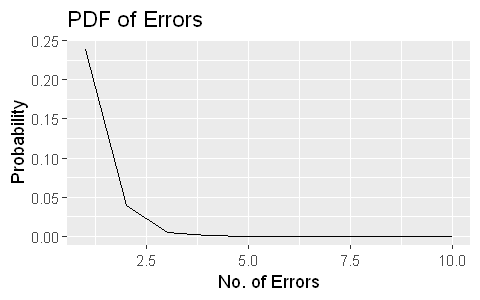

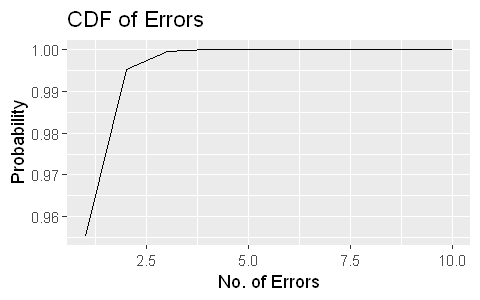

In [11]:
lambda = 1/3
N      = 10
df <- data.frame(no.errors = 1:N , error.pdf = dpois(1:N, lambda), error.cdf = ppois(1:N, lambda))

prob <- ppois(1, lambda=1/3, lower=FALSE)
cat("The probability that there is at least 1 error in a specific page is", prob)
#pdf
ggplot(data = df, aes(x =no.errors , y = error.pdf)) +
    labs(title = "PDF of Errors",
    x = "No. of Errors",
    y = "Probability") +
    geom_line(color='black', lwd=0.55)
#cdf
ggplot(data = df, aes(x =no.errors , y = error.cdf)) +
    labs(title = "CDF of Errors",
    x = "No. of Errors",
    y = "Probability") +
    geom_line(color='black', lwd=0.55)

## Exercise 4

In [12]:
#There are 4 aces among 52 cards
#We should run the experiment for N times and plot the distribution of the number at which an ace was drawn

N= 100000
deck      <- rep(0, 48)       # 0 : non-ace cards
deck      <- append(deck, rep(1,4))        # 1 : ace     cards
ace.found.at <- vector()

for (i in seq(1,N)){
ace.found <- FALSE
counter <- 1
while (ace.found == FALSE){
sample <- sample(deck,1,replace=TRUE)
if (sample != 1){
counter = counter + 1
} else {
ace.found = TRUE
ace.found.at <- append(ace.found.at, counter)}}}

df <- data.frame(ace.found.at = ace.found.at)

The probability we would need at least 10 tries to draw the ace is 0.44759

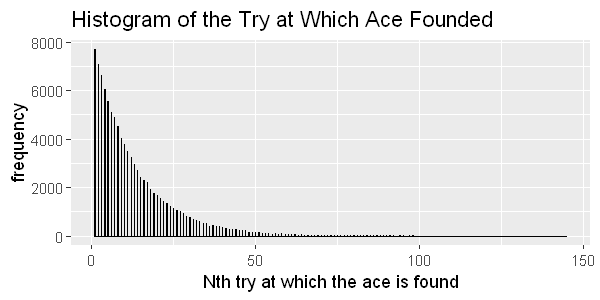

In [13]:
options(repr.plot.width=5, repr.plot.height =2.5) 

ggplot(df, aes(x=ace.found.at)) + 
    geom_histogram(color="black", fill="white", bins=2000) +
    labs(title = "Histogram of the Try at Which Ace Founded",
    x = "Nth try at which the ace is found",
    y = "frequency")

prob <- prob.more.than(ace.found.at, 10)
# prob <- length(ace.found.at[ace.found.at > 10])/length(ace.found.at)
cat("The probability we would need at least 10 tries to draw the ace is", prob)

## Exercise 5

In [14]:
#part A
dens.func <- function(t){(t-1)*(2-t)}
c <- norm.const(dens.func, 1,2)  #normalization constant
cat("The normalization constant is", c)
norm.dens.func <- function(t){6* (t-1)*(2-t)}

The normalization constant is 6

#### p for "probability", the cumulative distribution function (c. d. f.)
#### q for "quantile", the inverse c. d. f.
#### d for "density", the density function (p. f. or p. d. f.)
#### r for "random", a random variable having the specified distribution

In [15]:
#part B, Writing set of four functions

X    <- seq(1,2,0.01)
DF   <- data.frame(X=X)  #A dataframe to store all the variables
#pdf
dfunc <- function(f){
    pdf <- vector()
    for (x in X){pdf <- append(pdf, f(x))}
    DF$PDF <<- pdf}   #using global assignment operator

#cdf
pfunc    <- function(f){
    cdf.func <- function(x){return(integrate(f,1,x)$value)}
    cdf <- vector()
    for (x in X){cdf <- append(cdf, cdf.func(x))}
    DF$CDF <<- cdf}   

#quantile
qfunc  <- function(f){
    cdf.func <- function(x){return(integrate(f,1,x)$value)}
    quantile.func <- inverse(cdf.func, lower = 0, upper = 1)
    q <- vector()
    for (x in X){q <- append(q, quantile.func(x))}
    DF$Quantile <<- q}  

#random
rfunc <- function(f){
    cdf.func <- function(x){return(integrate(f,1,x)$value)}
    quantile.func <- inverse(cdf.func, lower = 0, upper = 1)
    X <- runif(101,0,1)
    r <- vector()
    for (x in X){r <- append(r, quantile.func(x))}
    DF$Random <<- r}  

In [16]:
#Running all the four functions and storing their output in DF
dfunc(norm.dens.func)
pfunc(norm.dens.func)
qfunc(norm.dens.func)
rfunc(norm.dens.func)

In [17]:
head(DF)  #A dataframe to store all the variables

X,PDF,CDF,Quantile,Random
1.00,0.0000,0.000000,0.5000000,0.6808575
1.01,0.0594,0.000298,0.4977843,0.8902078
1.02,0.1176,0.001184,0.4955830,0.6657660
1.03,0.1746,0.002646,0.4933930,0.5394261
1.04,0.2304,0.004672,0.4912156,0.5446115
1.05,0.2850,0.007250,0.4890507,0.6326159


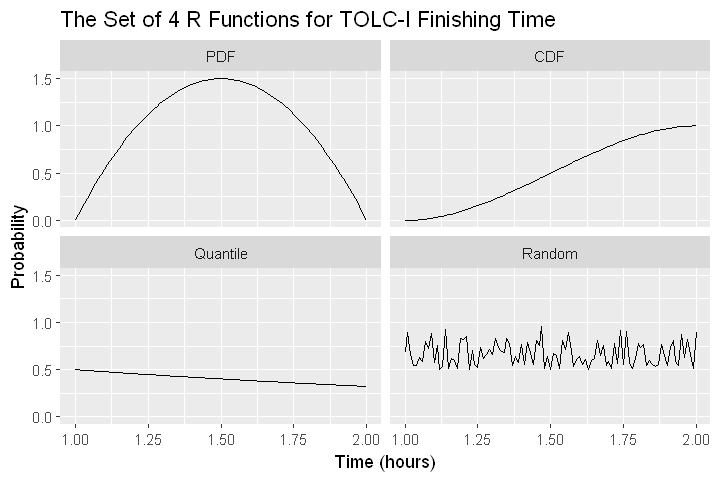

In [18]:
#Plotting the Stored Data

#melt data frame into long format
df <- melt(DF ,  id.vars = 'X', variable.name = 'series')

options(repr.plot.width=6, repr.plot.height =4)  #changing size of plots
ggplot(data = df, aes(x = X, y = value)) +
    geom_line() +
    facet_wrap(facets = vars(series))+
    labs(title = "The Set of 4 R Functions for TOLC-I Finishing Time",
         x = "Time (hours)",
         y = "Probability")

In [19]:
#part C
#since we are provided with the analytic function we use integration for this part
norm.dens.func <- function(t){c*(t-1)*(2-t)}

#prob of finishing in more than 75 minutes:
prob <- integrate(norm.dens.func, 1.25, 2)$value
cat("The probability that the student will finish the test in more than 75 minutes is", prob)
cat("\n")
#prob of finishing between 90 and 120 minutes 
prob <- integrate(norm.dens.func, 1.5, 2)$value
cat("The probability that the student will finish the test between 90 and 120 minutes is", prob)

The probability that the student will finish the test in more than 75 minutes is 0.84375
The probability that the student will finish the test between 90 and 120 minutes is 0.5

## Exercise 6

In [20]:
dens.func <- function(x){return(2/(x**2))}

In [21]:
#part A
X    <- seq(1,2,0.01)
DF   <- data.frame(X=X)  # A dataframe to store all the variables

dfunc(dens.func)
pfunc(dens.func)
# Warning: The other two functions lead to a divergant integral, therefore are not included here
# qfunc(norm.dens.func)
# rfunc(norm.dens.func)

In [22]:
head(DF)

X,PDF,CDF
1.00,2.000000,0.00000000
1.01,1.960592,0.01980198
1.02,1.922338,0.03921569
1.03,1.885192,0.05825243
1.04,1.849112,0.07692308
1.05,1.814059,0.09523810


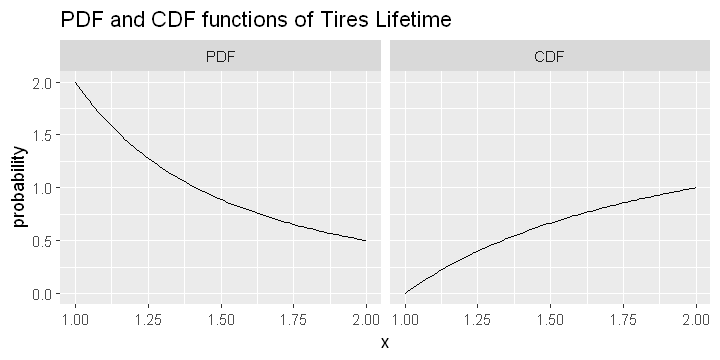

In [23]:
#Plotting the Stored Data

#melt data frame into long format
df <- melt(DF ,  id.vars = 'X', variable.name = 'series')

options(repr.plot.width=6, repr.plot.height =3)  #changing size of plots
ggplot(data = df, aes(x = X, y = value)) +
    geom_line() +
    facet_wrap(facets = vars(series))+
    labs(title = "PDF and CDF functions of Tires Lifetime",
         x = "x",
         y = "probability")

In [24]:
#part B
#prob that tire last less than 15000 km:
prob <- integrate(norm.dens.func, 1, 1.5)$value
cat("The probability that the tire will last less than 15000km is", prob)

The probability that the tire will last less than 15000km is 0.5

In [25]:
#part C
N= 3000
samples <- runif(N) + 1    #generating uniform random numbers between 1 and 2
probs <- dens.func(samples)
probs <- probs/sum(probs)  #normalizing the probabilites

cat("The mean value of x is", E.value(samples, probs))
cat("\n")
cat("The variance of x is",  VAR(samples, probs))

The mean value of x is 1.385449
The variance of x is 0.08128658